In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Regression models
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.svm import SVR # for support vector regression
from sklearn.tree import DecisionTreeRegressor # for decision tree regression
from sklearn.ensemble import RandomForestRegressor # for random forest regression
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Performance metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('C:\Vinay\Projects_for_Github\Insurance Cost Prediction\insurance.csv')


C:\Users\vinaysha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.9,0.0,yes,southwest,16884.92400
1,18.0,male,33.77,1.0,no,southeast,1725.55230
2,28.0,male,33,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.88,0.0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1341 non-null   float64
 1   sex       1341 non-null   object 
 2   bmi       1338 non-null   object 
 3   children  1341 non-null   float64
 4   smoker    1341 non-null   object 
 5   region    1340 non-null   object 
 6   charges   1341 non-null   float64
dtypes: float64(3), object(4)
memory usage: 73.5+ KB


In [4]:
df.describe()

,age,children,charges
count,1341.000000,1341.000000,1341.000000
mean,39.185682,1.095451,13263.325013
std,14.121085,1.205640,12099.812465
min,-19.000000,0.000000,1121.873900
25%,27.000000,0.000000,4738.268200
50%,39.000000,1.000000,9386.161300
75%,51.000000,2.000000,16586.497710
max,64.000000,5.000000,63770.428010


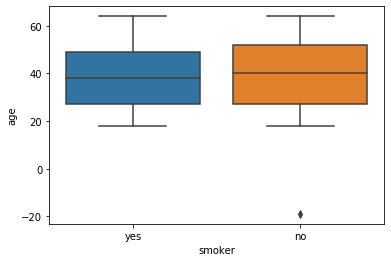

In [5]:
sns.boxplot(x='smoker',y='age', data=df)
plt.show()

In [6]:
null_data = df[df.isnull().any(axis=1)]
null_data

,age,sex,bmi,children,smoker,region,charges
9,60.0,female,25.84,0.0,no,NaN,28923.13692
11,62.0,female,NaN,0.0,yes,southeast,27808.72510
15,19.0,male,NaN,1.0,no,southwest,1837.23700
694,48.0,female,NaN,1.0,no,southwest,3577.99900
1341,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dropna(how = "all", inplace = True)

In [8]:
df["region"].fillna("None", inplace = True)

In [9]:
df[df["bmi"]=='x']

,age,sex,bmi,children,smoker,region,charges
5,31.0,female,x,0.0,no,southeast,3756.6216


In [10]:
df["bmi"].replace(to_replace ="x", value = np.nan, inplace=True)

In [11]:
df["bmi"] = df["bmi"].astype("float")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1341 non-null   float64
 1   sex       1341 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1341 non-null   float64
 4   smoker    1341 non-null   object 
 5   region    1341 non-null   object 
 6   charges   1341 non-null   float64
dtypes: float64(4), object(3)
memory usage: 83.8+ KB


In [13]:
smokers_df=df[df['smoker']=='yes']
non_smokers_df=df[df['smoker']=='no']

In [14]:
smokers_df.fillna(smokers_df['bmi'].mean(),inplace=True)

In [15]:
smokers_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
non_smokers_df.fillna(non_smokers_df['bmi'].mean(),inplace=True)

In [17]:
non_smokers_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
non_smokers_df.head(20)

,age,sex,bmi,children,smoker,region,charges
1,18.0,male,33.770000,1.0,no,southeast,1725.55230
2,28.0,male,33.000000,3.0,no,southeast,4449.46200
3,33.0,male,22.705000,0.0,no,northwest,21984.47061
4,32.0,male,28.880000,0.0,no,northwest,3866.85520
5,31.0,female,30.662408,0.0,no,southeast,3756.62160
6,46.0,female,33.440000,1.0,no,southeast,8240.58960
7,37.0,female,27.740000,3.0,no,northwest,7281.50560
8,37.0,male,29.830000,2.0,no,northeast,6406.41070
9,60.0,female,25.840000,0.0,no,None,28923.13692
10,25.0,male,26.220000,0.0,no,northeast,2721.32080


In [19]:
cleaned_data=pd.concat([smokers_df, non_smokers_df]).sort_index(axis = 0) 

In [20]:
cleaned_data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900000,0.0,yes,southwest,16884.92400
1,18.0,male,33.770000,1.0,no,southeast,1725.55230
2,28.0,male,33.000000,3.0,no,southeast,4449.46200
3,33.0,male,22.705000,0.0,no,northwest,21984.47061
4,32.0,male,28.880000,0.0,no,northwest,3866.85520
5,31.0,female,30.662408,0.0,no,southeast,3756.62160
6,46.0,female,33.440000,1.0,no,southeast,8240.58960
7,37.0,female,27.740000,3.0,no,northwest,7281.50560
8,37.0,male,29.830000,2.0,no,northeast,6406.41070
9,60.0,female,25.840000,0.0,no,None,28923.13692


In [21]:
cleaned_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1341 non-null   float64
 1   sex       1341 non-null   object 
 2   bmi       1341 non-null   float64
 3   children  1341 non-null   float64
 4   smoker    1341 non-null   object 
 5   region    1341 non-null   object 
 6   charges   1341 non-null   float64
dtypes: float64(4), object(3)
memory usage: 83.8+ KB


In [23]:
cleaned_data["age"] = cleaned_data["age"].astype("int")
cleaned_data["children"] = cleaned_data["children"].astype("int")
cleaned_data["sex"] = cleaned_data["sex"].astype("category")
cleaned_data["region"] = cleaned_data["region"].astype("category")


In [24]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1341 non-null   int32   
 1   sex       1341 non-null   category
 2   bmi       1341 non-null   float64 
 3   children  1341 non-null   int32   
 4   smoker    1341 non-null   object  
 5   region    1341 non-null   category
 6   charges   1341 non-null   float64 
dtypes: category(2), float64(2), int32(2), object(1)
memory usage: 55.3+ KB


In [25]:
cleaned_data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000,0,yes,southwest,16884.92400
1,18,male,33.770000,1,no,southeast,1725.55230
2,28,male,33.000000,3,no,southeast,4449.46200
3,33,male,22.705000,0,no,northwest,21984.47061
4,32,male,28.880000,0,no,northwest,3866.85520
5,31,female,30.662408,0,no,southeast,3756.62160
6,46,female,33.440000,1,no,southeast,8240.58960
7,37,female,27.740000,3,no,northwest,7281.50560
8,37,male,29.830000,2,no,northeast,6406.41070
9,60,female,25.840000,0,no,None,28923.13692


In [26]:
cleaned_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
cleaned_data=cleaned_data[cleaned_data['age'] > 0]
cleaned_data.shape

(1340, 7)

In [28]:
cleaned_data[cleaned_data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631
1308,29,female,21.85,0,yes,northeast,16115.3045
1336,50,male,30.97,3,no,northwest,10600.5483


In [29]:
cleaned_data.drop_duplicates(keep='last',inplace=True)

In [30]:
cleaned_data.shape

(1337, 7)

In [31]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(cleaned_data['sex']) 
cleaned_data['sex'] = le.transform(cleaned_data['sex'])
# smoker or not
le.fit(cleaned_data['smoker']) 
cleaned_data['smoker'] = le.transform(cleaned_data['smoker'])
cleaned_data.drop(['region'], axis = 1,inplace=True) 

In [32]:
cleaned_data.head(20)

,age,sex,bmi,children,smoker,charges
0,19,0,27.900000,0,1,16884.92400
1,18,1,33.770000,1,0,1725.55230
2,28,1,33.000000,3,0,4449.46200
3,33,1,22.705000,0,0,21984.47061
4,32,1,28.880000,0,0,3866.85520
5,31,0,30.662408,0,0,3756.62160
6,46,0,33.440000,1,0,8240.58960
7,37,0,27.740000,3,0,7281.50560
8,37,1,29.830000,2,0,6406.41070
9,60,0,25.840000,0,0,28923.13692


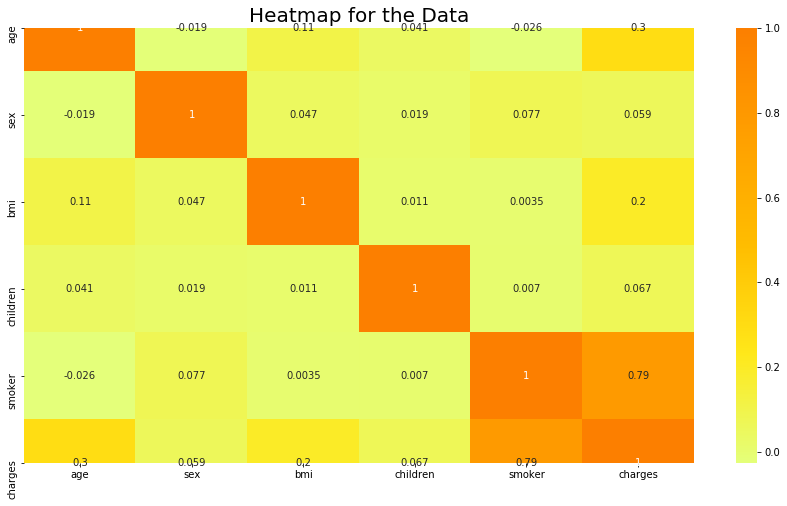

In [33]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(cleaned_data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

> The Above Graph for Showing the correlation between the different attributes of the Insurance prediction Dataset. This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.

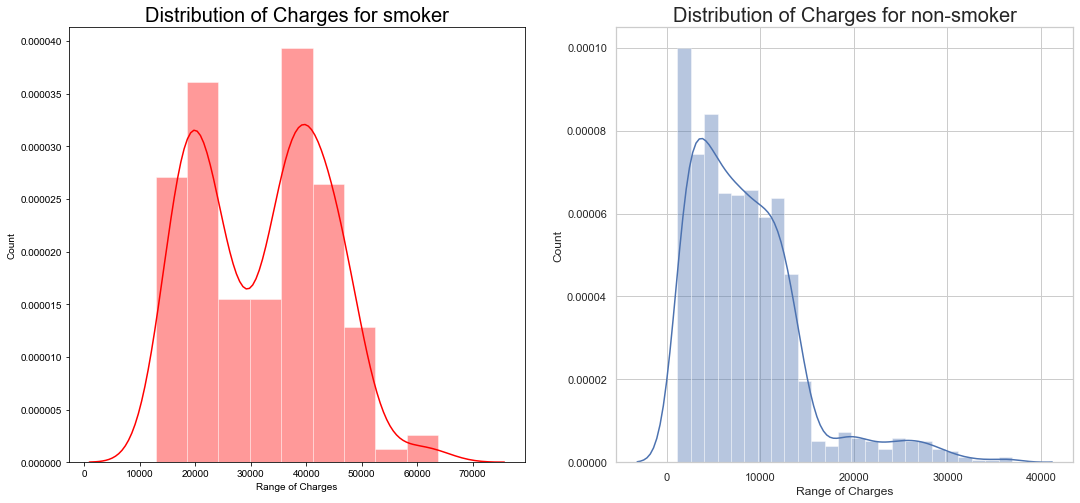

In [34]:
import warnings
warnings.filterwarnings('ignore')


plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(cleaned_data[(cleaned_data['smoker'] == 1)]["charges"],color = 'red')
plt.title('Distribution of Charges for smoker', fontsize = 20)
plt.xlabel('Range of Charges')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(cleaned_data[(cleaned_data['smoker'] == 0)]["charges"])
plt.title('Distribution of Charges for non-smoker', fontsize = 20)
plt.xlabel('Range of Charges')
plt.ylabel('Count')
plt.show()

>Smoking patients spend more on treatment. But there is a feeling that the number of non-smoking patients is greater. We will be going to check that.

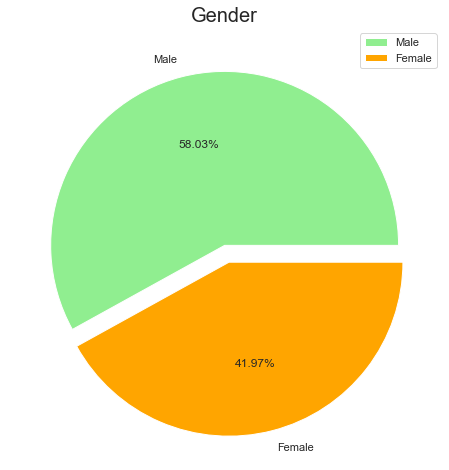

In [35]:
labels = ['Male', 'Female']
size = cleaned_data[(cleaned_data['smoker'] == 1)]["sex"].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]


plt.pie(size, colors = colors,explode=explode, labels = labels, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.legend()
plt.show()

> By looking at the above pie chart which explains about the distribution of Gender who are smokers.
>> The Males are in the lead with a share of 58% whereas the females have a share of 41%.

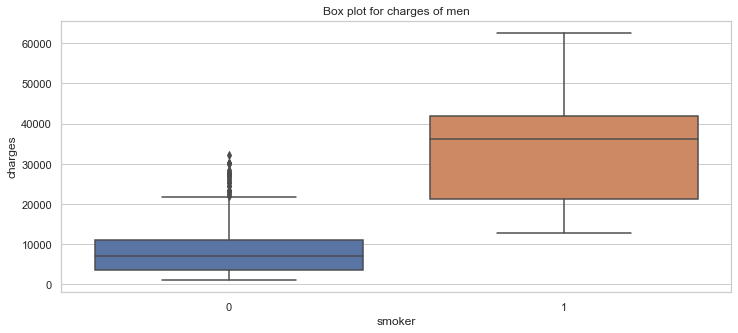

In [36]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")

sns.boxplot(x='smoker',y='charges', data =  cleaned_data[(cleaned_data['sex'] == 1)])
plt.show()

>Please note that women are coded with the symbol "0" and men - "1".Also we can notice that more male smokers than women smokers. 
>>It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking

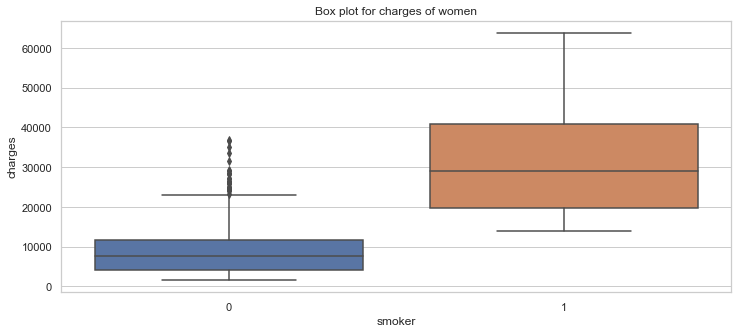

In [37]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")

sns.boxplot(x='smoker',y='charges', data =  cleaned_data[(cleaned_data['sex'] == 0)])
plt.show()

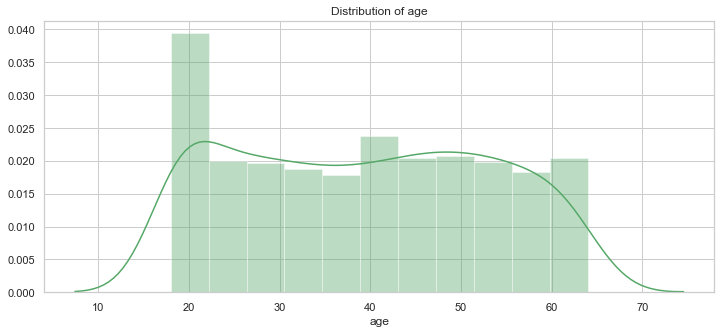

In [38]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(cleaned_data["age"], color = 'g')

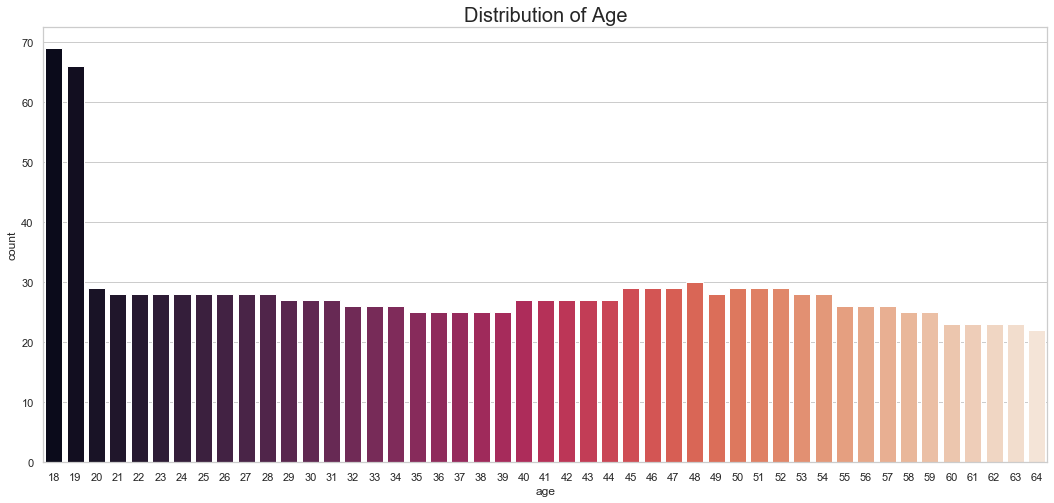

In [39]:
sns.countplot(cleaned_data['age'], palette = 'rocket')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

Text(0.5, 1, 'The number of smokers and non-smokers (18 years old)')

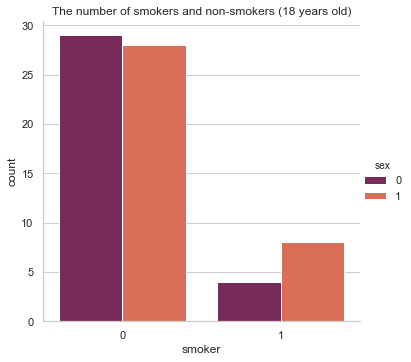

In [40]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rocket", data=cleaned_data[(cleaned_data['age'] == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

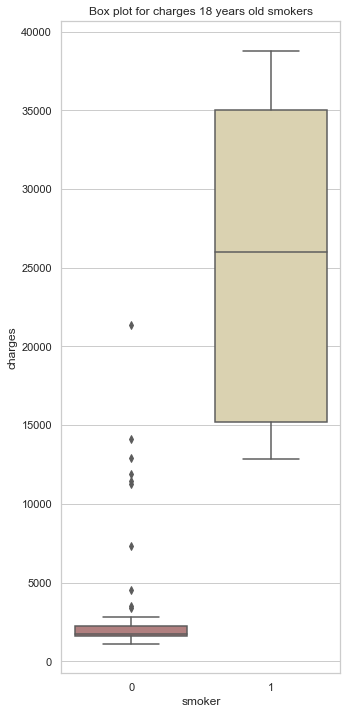

In [41]:
plt.figure(figsize=(5,12))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="charges", x="smoker", data = cleaned_data[(cleaned_data['age'] == 18)] , palette = 'pink')

>As we can see, even at the age of 18 smokers spend much more on treatment than non-smokers. 



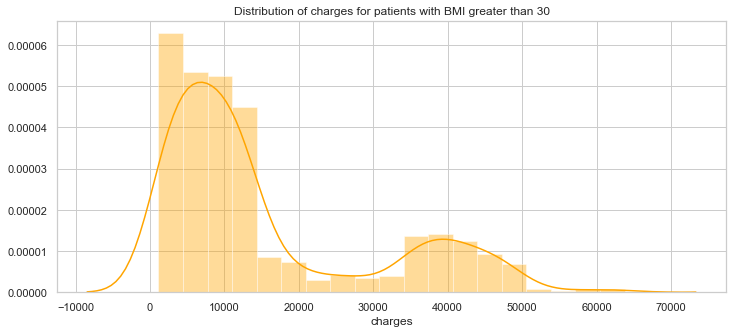

In [42]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(cleaned_data[(cleaned_data['bmi'] >= 30)]['charges'], color = 'orange')

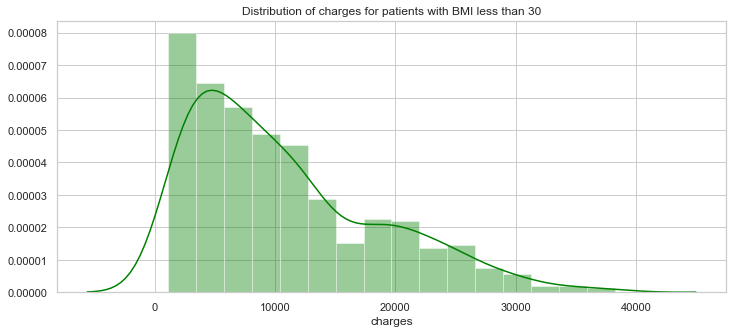

In [43]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(cleaned_data[(cleaned_data['bmi'] < 30)]['charges'], color = 'green')

>Patients with BMI above 30 spend more on treatment!



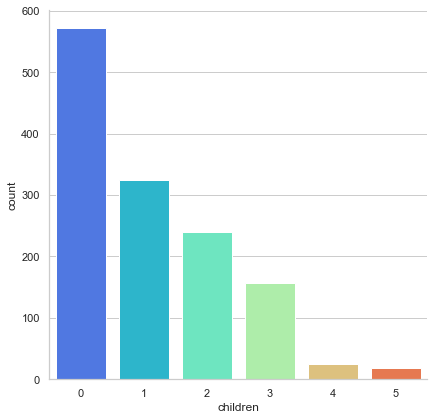

In [44]:
sns.catplot(x="children", kind="count", palette="rainbow", data=cleaned_data, size = 6)

Text(0.5, 1, 'Smokers and non-smokers who have childrens')

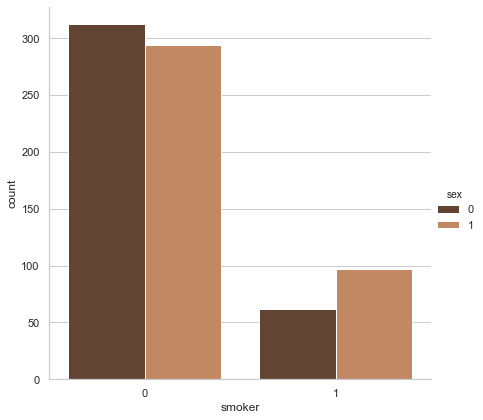

In [45]:
sns.catplot(x="smoker", kind="count", palette="copper",hue = "sex",
            data=cleaned_data[(cleaned_data['children'] > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

>So, non-smoking parents are much more!

In [46]:
X = cleaned_data.drop('charges', axis = 1).values
y = cleaned_data['charges'].values.reshape(-1,1)

In [47]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [48]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1002, 5)
Shape of X_test:  (335, 5)
Shape of y_train:  (1002, 1)
Shape of y_test (335, 1)


**Linear Regression**

In [49]:
# Creating the linear regressor
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X, y = y, cv = 10)
# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7433802930641027
R2_score (train):  0.7515590545528669
R2_score (test):  0.7371770067143147
RMSE:  6795.202719131444


**Support Vector Regression**

In [51]:
# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)

In [52]:
# Creating the SVR regressor
regressor_svr = SVR()

In [53]:
# Applying Grid Search to find the best model and the best parameters
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
regressor_svr = GridSearchCV(estimator = regressor_svr,
                           param_grid = parameters,
                           cv = 10,
                           n_jobs = -1)

regressor_svr = regressor_svr.fit(X_scaled, y_scaled.ravel())

In [54]:
print(regressor_svr.best_params_)
print(regressor_svr.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.8441585543259598


In [55]:
# Predicting Cross Validation Score
cv_svr = regressor_svr.best_score_

# Predicting R2 Score the Train set results
y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_train)))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score the Test set results
y_pred_svr_test = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting RMSE the Test set results
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

CV:  0.8441585543259598
R2_score (train):  0.8592103414859329
R2_score (test):  0.8463431488260558
RMSE:  5195.731541698983


**Decision Tree Regression**

In [56]:
# Creating the Decision Tree regressor
regressor_dt = DecisionTreeRegressor()

In [57]:
# Applying Grid Search to find the best model and the best parameters
parameters = [ { "max_depth": np.arange(1,21),
              "min_samples_leaf": [1, 5, 10, 20, 50, 100],
              "min_samples_split": np.arange(2, 11),
              "criterion": ["mse"]}
            ]
regressor_dt = GridSearchCV(estimator = regressor_dt,
                           param_grid  = parameters,
                           cv = 10,
                           n_jobs = -1)
regressor_dt = regressor_dt.fit(X_scaled, y_scaled)

In [58]:
print(regressor_dt.best_params_)
print(regressor_dt.best_score_)

{'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.8526865909878307


In [59]:
# Predicting Cross Validation Score
cv_dt = regressor_dt.best_score_

# Predicting R2 Score the Train set results
y_pred_dt_train = sc_y.inverse_transform(regressor_dt.predict(sc_X.transform(X_train)))
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = sc_y.inverse_transform(regressor_dt.predict(sc_X.transform(X_test)))
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.8526865909878307
R2_score (train):  0.8786020713947155
R2_score (test):  0.8625756113854242
RMSE:  4913.632205473892


**Random Forest Regression**

In [60]:
# Creating the Random Forest regressor
regressor_rf = RandomForestRegressor()

In [61]:
# Applying GridSearch to find the best model and the best parameters
parameters =  { "n_estimators": [1200],
                "max_features": ["auto"],
                "max_depth": [50],
                "min_samples_split": [7],
                "min_samples_leaf": [10],
                "bootstrap": [True],
                "criterion": ["mse"]}
            
regressor_rf = GridSearchCV(estimator = regressor_rf,
                                  param_grid = parameters,
                                  cv = 10,
                                  n_jobs = -1)
regressor_rf = regressor_rf.fit(X_scaled, y.ravel())

In [62]:
print(regressor_rf.best_params_)
print(regressor_rf.best_score_)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 1200}
0.8546030224251556


In [63]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = regressor_rf.best_score_

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(sc_X.transform(X_train))
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(sc_X.transform(X_test))
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8546030224251556
R2_score (train):  0.890888388880356
R2_score (test):  0.8799119970749038
RMSE:  4593.254932885797


**Finding the best model**


In [64]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [65]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,6795.202719,0.751559,0.737177,0.743380
1,Support Vector Regression,5195.731542,0.859210,0.846343,0.844159
2,Decision Tree Regression,4913.632205,0.878602,0.862576,0.852687
3,Random Forest Regression,4593.254933,0.890888,0.879912,0.854603


**Visualizing Models Performance**


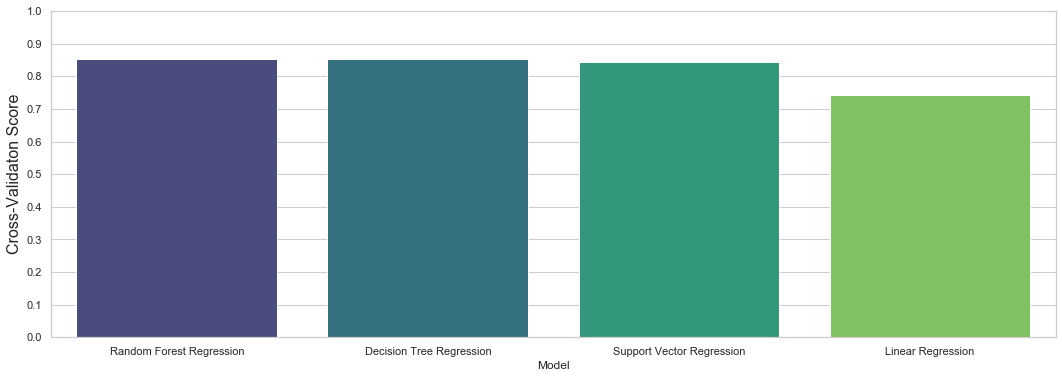

In [66]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Model', y='Cross-Validation', data = predict, palette='viridis',ax = axe)
axe.set_xlabel('Model')
axe.set_ylabel('Cross-Validaton Score', size=16)
axe.set_ylim(0,1.0)
axe.set_yticks(np.arange(0, 1.1, 0.1))
plt.show()

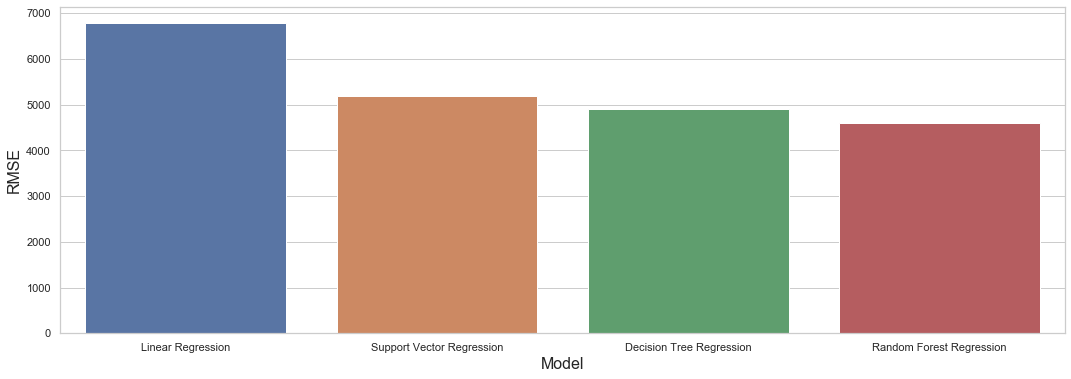

In [67]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

> I have built 4 regression models for this dataset. Then measured and visualized the performance of these models and it can be clearly seen that random forest model performs the best.